# Import libraries

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Load some house value vs. crime rate data

Dataset is from Philadelphia, PA and includes average house sales price in a number of neighborhoods.  The attributes of each neighborhood we have include the crime rate ('CrimeRate'), miles from Center City ('MilesPhila'), town name ('Name'), and county name ('County').

In [4]:
sales = pd.read_csv('data\week1_Philadelphia_Crime_Rate_noNA.csv')

sales.head()

,HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
0,140463,14.0463,29.7,10.0,-1.0,Abington,Montgome
1,113033,11.3033,24.1,18.0,4.0,Ambler,Montgome
2,124186,12.4186,19.5,25.0,8.0,Aston,Delaware
3,110490,11.0490,49.4,25.0,2.7,Bensalem,Bucks
4,79124,7.9124,54.1,19.0,3.9,Bristol B.,Bucks


# Exploring the data 

The house price in a town is correlated with the crime rate of that town. Low crime towns tend to be associated with higher house prices and vice versa.

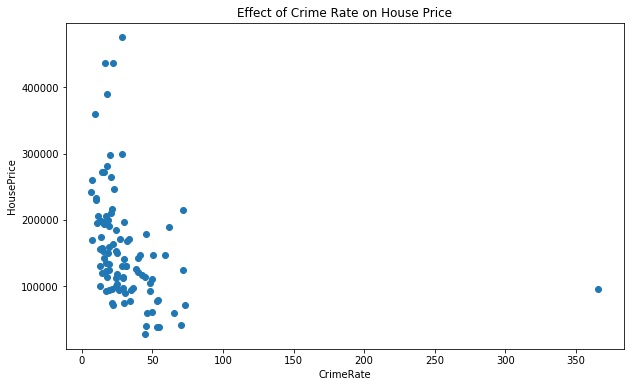

In [5]:
#define plot space
fig ,ax = plt.subplots(figsize=(10,6))

#Define x & y axes
ax.scatter(x=sales['CrimeRate'],y=sales['HousePrice'])

#Set the plot title and axes labels
ax.set(title="Effect of Crime Rate on House Price",
      xlabel = "CrimeRate",
      ylabel= "HousePrice")

plt.show()

# Fit the regression model using crime as the feature

In [8]:
# BUILD REGRESSION MODEL
crime_model = LinearRegression()

x = sales[['CrimeRate']]
y = sales['HousePrice']

crime_model = crime_model.fit(x,y)
crime_model.score(x,y)

predicted_output = crime_model.predict(sales[['CrimeRate']])
p1 = crime_model.predict(sales[['HousePrice']])

# Let's see what our fit looks like

Matplotlib is a Python plotting library that is also useful for plotting.  You can install it with:

    'pip install matplotlib'

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


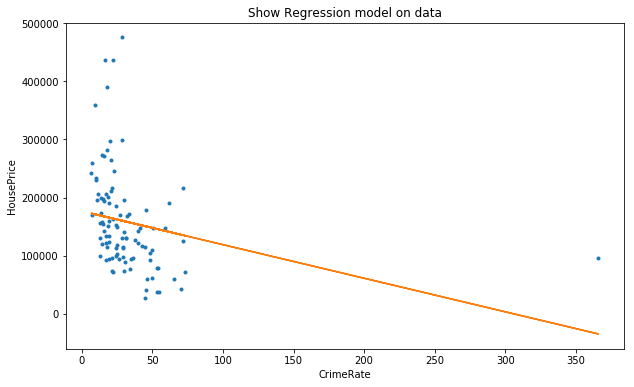

In [10]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(sales['CrimeRate'], sales['HousePrice'],'.',
        sales['CrimeRate'], crime_model.predict(sales[['CrimeRate']]),'-')

ax.set(title='Show Regression model on data',
       xlabel= 'CrimeRate',
       ylabel= 'HousePrice')

fig.show()

Above: blue dots are original data, green line is the fit from the simple regression.

# Remove Center City and redo the analysis

Center City is the one observation with an extremely high crime rate, yet house prices are not very low.  This point does not follow the trend of the rest of the data very well.  A question is how much including Center City is influencing our fit on the other datapoints.  Let's remove this datapoint and see what happens.

In [11]:
sales_noCC = sales[sales['MilesPhila'] != 0.0] 

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


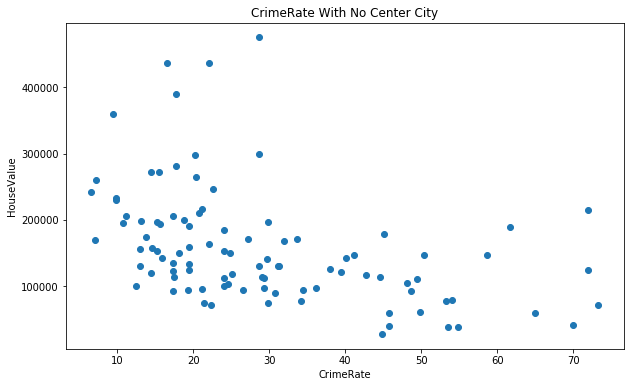

In [12]:
fig ,ax = plt.subplots(figsize=(10,6))

ax.scatter(x=sales_noCC['CrimeRate'],y=sales_noCC['HousePrice'])

ax.set(title='CrimeRate With No Center City',
       xlabel='CrimeRate',
       ylabel='HouseValue')

fig.show()

### Refit our simple regression model on this modified dataset:

In [13]:
# No Center city
crime_model_noCC = LinearRegression()

x = sales_noCC[['CrimeRate']]
y = sales_noCC['HousePrice']

crime_model_noCC = crime_model_noCC.fit(x,y)
crime_model_noCC.score(x,y)

0.18422882936911944

### Look at the fit:

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


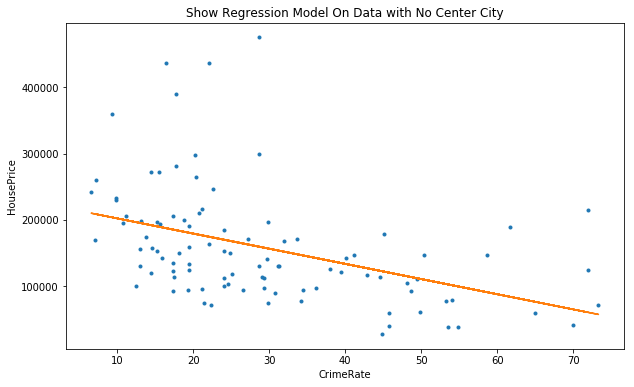

In [14]:
fig ,ax = plt.subplots(figsize=(10,6))

ax.plot(sales_noCC['CrimeRate'], sales_noCC['HousePrice'], '.',
         sales_noCC['CrimeRate'], crime_model_noCC.predict(sales_noCC[['CrimeRate']]),'-')

ax.set(title='Show Regression Model On Data with No Center City',
       xlabel='CrimeRate',
       ylabel='HousePrice')

fig.show()

# Compare coefficients for full-data fit versus no-Center-City fit

Visually, the fit seems different, but let's quantify this by examining the estimated coefficients of our original fit and that of the modified dataset with Center City removed.

In [15]:
# Crime_model coefficients
w0 = crime_model.coef_
w1 = crime_model.intercept_

print('w0 = %d\nw1 = %d'%(w0,w1))

w0 = -576
w1 = 176629


In [16]:
# Crime_model_noCC coefficients
w0_noCC = crime_model_noCC.coef_
w1_noCC = crime_model_noCC.intercept_

print('w0 = %d\nw1 = %d'%(w0_noCC,w1_noCC))

w0 = -2288
w1 = 225233


Above: We see that for the "no Center City" version, per unit increase in crime, the predicted decrease in house prices is 2,287.  In contrast, for the original dataset, the drop is only 576 per unit increase in crime.  This is significantly different!

### High leverage points: 
Center City is said to be a "high leverage" point because it is at an extreme x value where there are not other observations.  As a result, recalling the closed-form solution for simple regression, this point has the *potential* to dramatically change the least squares line since the center of x mass is heavily influenced by this one point and the least squares line will try to fit close to that outlying (in x) point.  If a high leverage point follows the trend of the other data, this might not have much effect.  On the other hand, if this point somehow differs, it can be strongly influential in the resulting fit.

### Influential observations:  
An influential observation is one where the removal of the point significantly changes the fit.  As discussed above, high leverage points are good candidates for being influential observations, but need not be.  Other observations that are *not* leverage points can also be influential observations (e.g., strongly outlying in y even if x is a typical value).

# Remove high-value outlier neighborhoods and redo analysis

Based on the discussion above, a question is whether the outlying high-value towns are strongly influencing the fit.  Let's remove them and see what happens.

In [18]:
# Remove high price
sales_nohighend = sales_noCC[sales_noCC['HousePrice'] < 350000] 

# Fit a Regression Model on this new data
crime_model_nohighend = LinearRegression()

x = sales_nohighend[['CrimeRate']]
y = sales_nohighend['HousePrice']

crime_model_nohighend = crime_model_nohighend.fit(x,y)

### Do the coefficients change much?

In [19]:
# Crime_model_noCC coefficients
print('w0 = %d\nw1 = %d'%(w0_noCC,w1_noCC))

w0 = -2288
w1 = 225233


In [20]:
# Crime_model_nohighend coefficients
w0_nohighend = crime_model_nohighend.coef_
w1_nohighend = crime_model_nohighend.intercept_

print('w0 = %d\nw1 = %d'%(w0_nohighend,w1_nohighend))

w0 = -1838
w1 = 199098


Above: We see that removing the outlying high-value neighborhoods has *some* effect on the fit, but not nearly as much as our high-leverage Center City datapoint.

### The summary of all this analysis
> When you have your data, and your making some fit and making predictions or interpreting the coefficients.

> It's really important to do some data analysis to do visualizations of your data or different checks for whether you have these high leverage points or these outline observations and checking whether they might potentially be these influential observations.

    Because that can dramatically change how you're interpreting or what you're predicting based on your estimated fit.    